In [12]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [13]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/plot.py'>

In [14]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/paper_utils.py'>

In [15]:
sample_sizes = [10, 100, 500,1000, 2000, 3000,4000,5000]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../data/Output/mcm/sample_sizes")


In [16]:
test_probs = np.load("./../data/OUTPUT/mcm/general_files/test_probs_all_MCM_all_dig_10runs.npy")


In [17]:
test_probs.shape

(10, 8, 10, 10, 892)

0.0013106502033348986

/var/folders/z9/j9843dsj2t5dsl2bv81xcwww0000gn/T/ipykernel_13372/1026860238.py:38: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


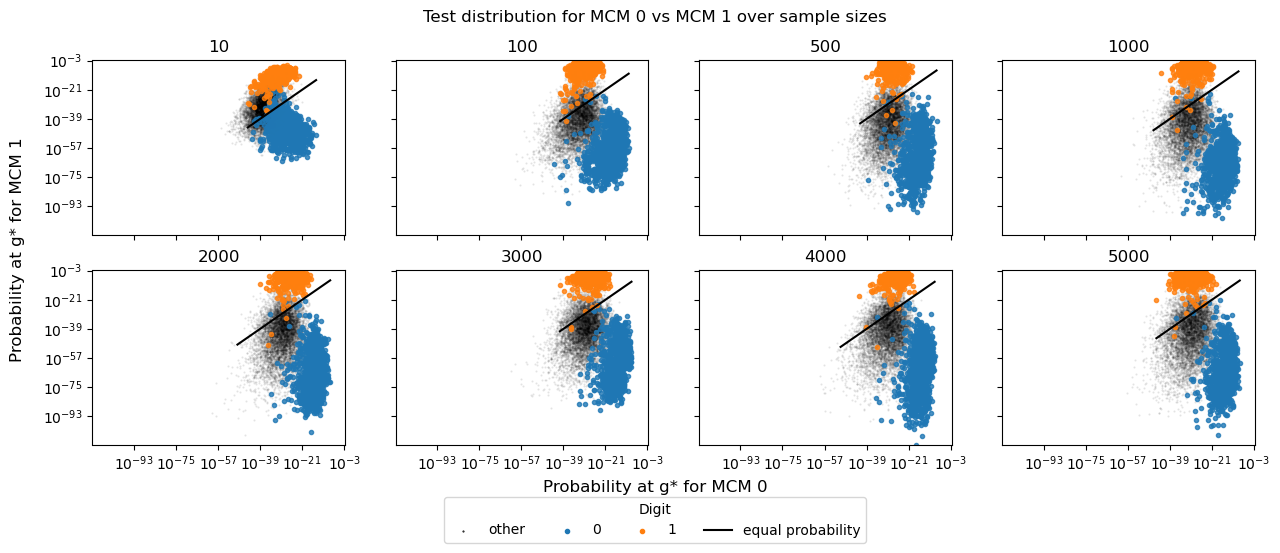

In [36]:
seedigit = 1
mcms = np.array([0,1])
not_mcms = np.setdiff1d(np.arange(10), mcms)

gmin = test_probs[mcms,:,0,:].min()
gmax = test_probs[mcms,:,0,:].max()


colors = myplot.get_list_fromcmap("tab10", N=10)
fig, axs = plt.subplots(2,len(sample_sizes)//2, figsize=(15,5),sharex=True, sharey=True)
axs = np.ravel(axs)
for ss_idx, sample_size in enumerate(sample_sizes):
    probs_mcms_digits = test_probs[:,ss_idx,0,:]
    ax = axs[ss_idx]
    

    ax.scatter(probs_mcms_digits[mcms[0],not_mcms],probs_mcms_digits[mcms[1],not_mcms], color = "black", marker=".",s=1, alpha = .1, label="other")
    for digit in mcms:
        ax.scatter(probs_mcms_digits[mcms[0],digit],probs_mcms_digits[mcms[1],digit], color=colors[digit], marker=".", alpha = .8, label=digit)

    max = np.min([np.max(probs_mcms_digits[mcms,dig]) for dig in mcms])
    min = np.max([np.min(probs_mcms_digits[mcms,dig]) for dig in mcms])
    ax.plot((min,max),(min,max),color="black", label="equal probability")


    ax.set(xlim=(gmin,gmax),ylim=(gmin,gmax))
    # ax.set_aspect('box')
    ax.set_title(sample_size)

ax.set_xscale("log")
ax.set_yscale("log")
handles, labels = ax.get_legend_handles_labels()
# leg = fig.legend(handles, labels, loc='center right', ncol=1,bbox_to_anchor=(1,0.5)) #bbox_to_anchor=(.95,0.5)
leg = fig.legend(handles, labels, loc='lower center', ncol=4,bbox_to_anchor=(.5,-0.1)) #bbox_to_anchor=(.95,0.5)

leg.set_title("Digit")

for lh in leg.legendHandles: 
    lh.set_alpha(1)

fig.supxlabel(f"Probability at g* for MCM {mcms[0]}")
fig.suptitle(f"Test distribution for MCM 0 vs MCM 1 over sample sizes")

supylabel = fig.supylabel(f'Probability at g* for MCM {mcms[1]}')
supylabel.set_x(supylabel.get_position()[0] + 0.05)

plt.show()




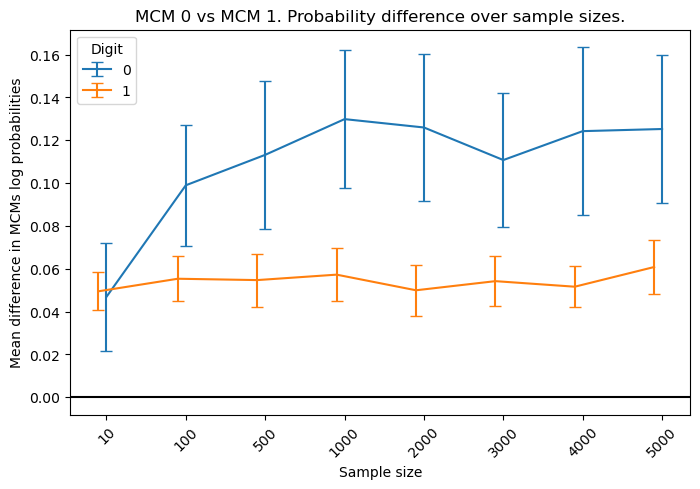

In [19]:
# compute euclidean distance for each n, for paired samples
# for an image, distance between the probabilities MCM A and MCM B assign
mcms = [0,1]
p_mcm_sample_digit = test_probs[:,:,0,:]

tick_pos = np.array(range(len(sample_sizes)))
# showing digit 0 to both mcm
# how much larger is mcm A for own digit than mcm B
# mcmA = (np.log(p_mcm_sample_digit[mcms[0],:,mcms[0]]) - np.log(p_mcm_sample_digit[mcms[1],:,mcms[0]]))/test_probs.shape[-1]
# mcmB = (np.log(p_mcm_sample_digit[mcms[1],:,mcms[1]]) - np.log(p_mcm_sample_digit[mcms[0],:,mcms[1]]))/test_probs.shape[-1]
mcmA = (np.log(p_mcm_sample_digit[mcms[0],:,mcms[0]]) - np.log(p_mcm_sample_digit[mcms[1],:,mcms[0]]))/test_probs.shape[-1]
mcmB = (np.log(p_mcm_sample_digit[mcms[1],:,mcms[1]]) - np.log(p_mcm_sample_digit[mcms[0],:,mcms[1]]))/test_probs.shape[-1]



fig, axs = plt.subplots(1, 1, figsize=(8, 5))
ax = axs


ax.errorbar(x = tick_pos, y = np.mean(mcmA,axis=1), yerr= np.std(mcmA,axis=1),capsize=4, label=str(mcms[0]), color=colors[mcms[0]])
ax.errorbar(x = tick_pos-.1, y = np.mean(mcmB,axis=1), yerr= np.std(mcmB,axis=1),capsize=4, label=str(mcms[1]), color=colors[mcms[1]])
ax.axhline(0, color="black")

# ax.text(0, 1, 'higher to own', ha='left', va='bottom', transform=ax.transAxes))
# ax.text(0, -1, 'lower to own digit', ha='left', va='top', transform=ax.transAxes))

plt.ylabel(f"Mean difference in MCMs log probabilities")
plt.xlabel("Sample size")
plt.legend(title="Digit")
plt.title(f"MCM {mcms[0]} vs MCM {mcms[1]}. Probability difference over sample sizes.")

plt.xticks(list(range(len(sample_sizes))),sample_sizes,rotation=45)
plt.show()


In [20]:
# fig, axs = plt.subplots(1, 1, figsize=(8, 5))
# ax = axs
# # ax = axs[0]
# ax.boxplot(norms, positions=range(10))
# norm500 = np.array([utils.norm_distribution_distance(np.log(test_probs_avg500[:,mcm_digit]),np.log(test_probs_avg500[:,dig])) for dig in range(test_probs_avg500.shape[1])])
# ax.plot(norm500,marker=".",label="500x10")
# norm5k = np.array([utils.norm_distribution_distance(np.log(inp5k[:,mcm_digit]),np.log(inp5k[:,dig])) for dig in range(inp5k.shape[1])])
# ax.plot(norm5k,marker=".",label="5k")


# ax.set_title("TVDS")
# ax.legend(loc="lower right")

# fig.suptitle(f"MCM {mcm_digit}. Hirachical cluster MCM 500 \n vs 5000 single \n vs {n_runs} individual runs of 500.")
# fig.supylabel("Distance")
# fig.supxlabel("Digit index")
# fig.tight_layout()
# plt.show()

# KDE TRIES ----------

/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/seaborn

KeyboardInterrupt: 

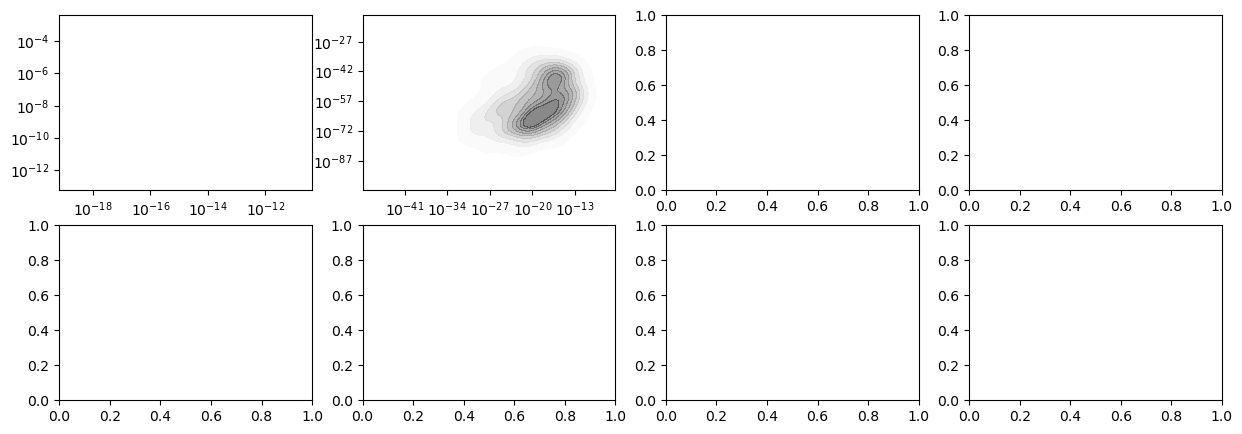

In [21]:
seedigit = 1
mcms = np.array([0,1])
not_mcms = np.setdiff1d(np.arange(10), mcms)




# colors = myplot.get_list_fromcmap("tab10", N=10)
fig, axs = plt.subplots(2,len(sample_sizes)//2, figsize=(15,5))#,sharex=True, sharey=True)
axs = np.ravel(axs)
for ss_idx, sample_size in enumerate(sample_sizes):
    probs_mcms_digits = test_probs[:,ss_idx,0,:]
    ax = axs[ss_idx]
    
    # other_digits_probs = probs_mcms_digits[:,not_mcms].reshape((10,892*8))
    # sns.kdeplot(x = other_digits_probs[mcms[0]].T, y = other_digits_probs[mcms[1]].T, log_scale=True, cmap="Greys", ax=ax, alpha=.5, fill=True)

    for digit in mcms:
        sns.kdeplot(x=probs_mcms_digits[mcms[0],digit],y=probs_mcms_digits[mcms[1],digit], log_scale=True, cmap="Greys", ax=ax, alpha=.5, fill=True, common_norm=False)

        # ax.scatter(probs_mcms_digits[mcms[0],digit],probs_mcms_digits[mcms[1],digit], color=colors[digit], marker=".", alpha = 1, label=digit)

    # max = np.min([np.max(probs_mcms_digits[mcms,dig]) for dig in mcms])
    # min = np.max([np.min(probs_mcms_digits[mcms,dig]) for dig in mcms])
    # ax.plot((min,max),(min,max),color="black", label="equal probability")
    # ax.set_title(sample_size)

    # ax.set_xscale("log")
    # ax.set_yscale("log")
#     if ss_idx ==1:
#         break
# handles, labels = ax.get_legend_handles_labels()
# leg = fig.legend(handles, labels, loc='center right', ncol=1,bbox_to_anchor=(.98,0.5)) #bbox_to_anchor=(.95,0.5)
# leg.set_title("Digit")

# fig.supxlabel(f"Probability at g* for MCM {mcms[0]}")
# fig.suptitle(f"Test distribution for MCM 0 vs MCM 1 over sample sizes")

# supylabel = fig.supylabel(f'Probability at g* for MCM {mcms[1]}')
# supylabel.set_x(supylabel.get_position()[0] + 0.05)

# plt.show()




In [ ]:
other_digits_probs[mcms[0]].shape

NameError: name 'other_digits_probs' is not defined

/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/seaborn

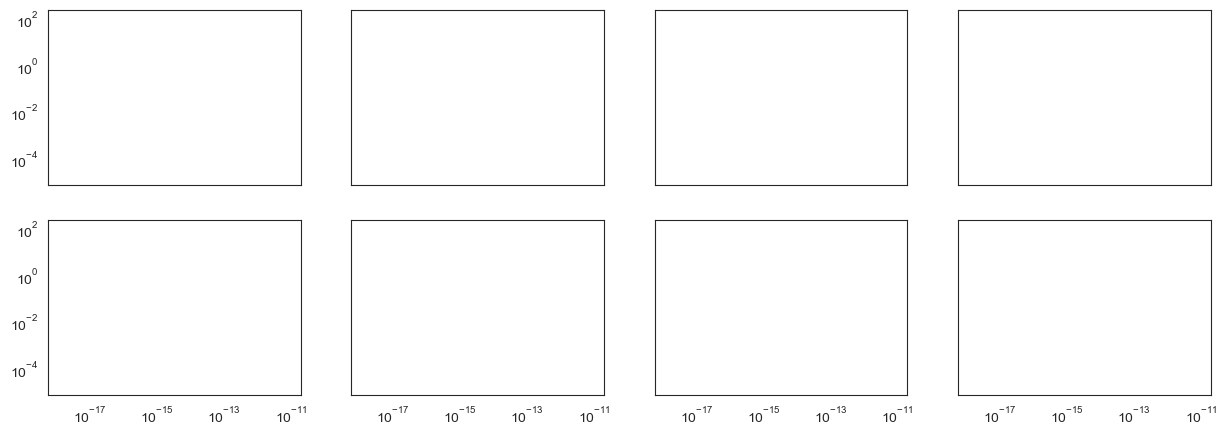

In [ ]:
seedigit = 1
mcms = np.array([0,1])
not_mcms = np.setdiff1d(np.arange(10), mcms)

rands1 = np.random.standard_normal((100))
rands2 = np.random.standard_normal((100))*rands1[::-1]

colors = myplot.get_list_fromcmap("tab10", N=10)
fig, axs = plt.subplots(2,len(sample_sizes)//2, figsize=(15,5),sharex=True, sharey=True)
axs = np.ravel(axs)
for ss_idx, sample_size in enumerate(sample_sizes):
    probs_mcms_digits = test_probs[:,ss_idx,0,:]
    ax = axs[ss_idx]
    
    other_digits_probs = probs_mcms_digits[:,not_mcms].reshape((10,892*8))
    # sns.kdeplot(x = other_digits_probs[mcms[0]].T, y = other_digits_probs[mcms[1]].T, log_scale=True, cmap="Greys", ax=ax, alpha=.5, fill=True,n_levels=3)
    sns.kdeplot(x = other_digits_probs[mcms[0]], y = other_digits_probs[mcms[1]], ax=ax, common_norm=False, log_scale=True)
    # plt.scatter(other_digits_probs[mcms[0]], other_digits_probs[mcms[1]])
    # break

plt.show()


